In [18]:
# Tutoring myself with pytorch

import torch as t

x = t.rand(3, requires_grad = True)

y = x+2

z = y*y*2

z = z.mean()
y.retain_grad()
z.backward() # dz/dx

print(y.grad)

tensor([3.7199, 3.7495, 3.3422])


In [1]:
from imports import *

with open("data/pythia_val_data_b16.pkl", "rb") as f:
    val_dataloader = pickle.load(f)

model = LanguageModel("EleutherAI/pythia-70m", device_map = "cpu")
print(model)
# with model.trace(inputs["input_ids"]) as tracer:
    
#     output_mlp = model.gpt_neox.layers[0].mlp.dense_4h_to_h.output.grad.save()
#     output_attn = model.gpt_neox.layers[0].attention.dense.output.grad.save()
    
    
#     model.output.logits.sum().backward()

# print(output_mlp)
# print();print()
# print(output_attn)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since roneneldan/TinyStories couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/maheepchaudhary/.cache/huggingface/datasets/roneneldan___tiny_stories/default/0.0.0/f54c09fd23315a6f9c86f9dc80f725de7d8f9c64 (last modified on Sun Sep  8 14:32:36 2024).


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 5/21990 [00:49<60:13:02,  9.86s/it]


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

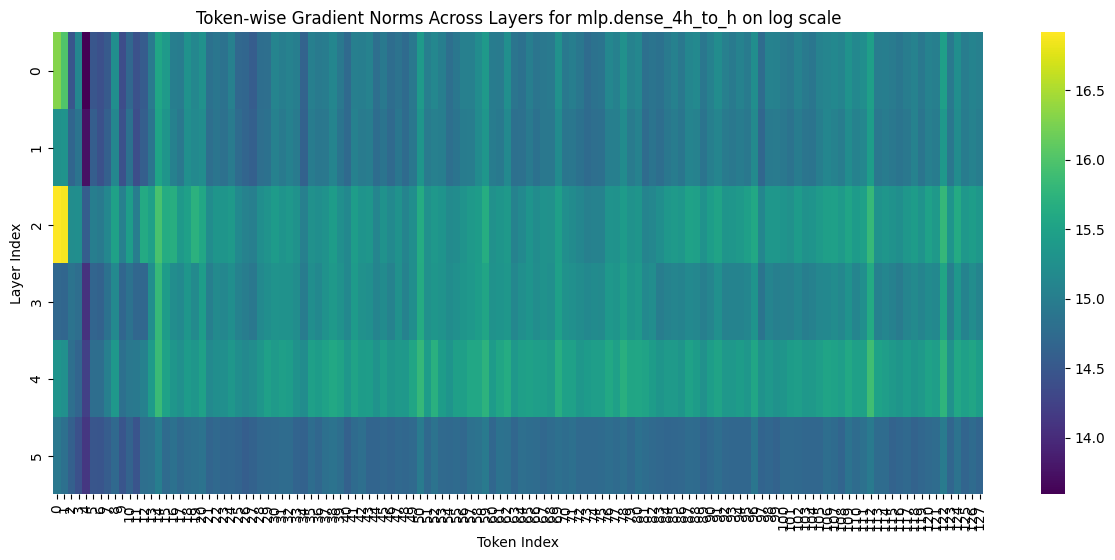

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token
data = load_dataset("roneneldan/TinyStories")
train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)

    if index == 5:
        break


# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.savefig("Pythia_MLP_Grad_50_samples.png")
plt.close

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 100/21990 [15:04<54:59:05,  9.04s/it]


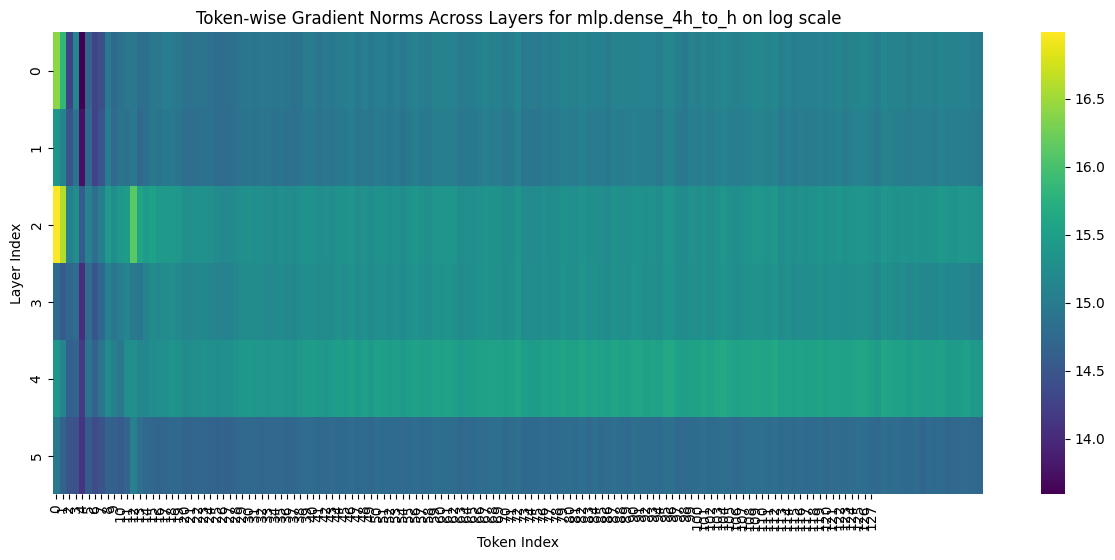

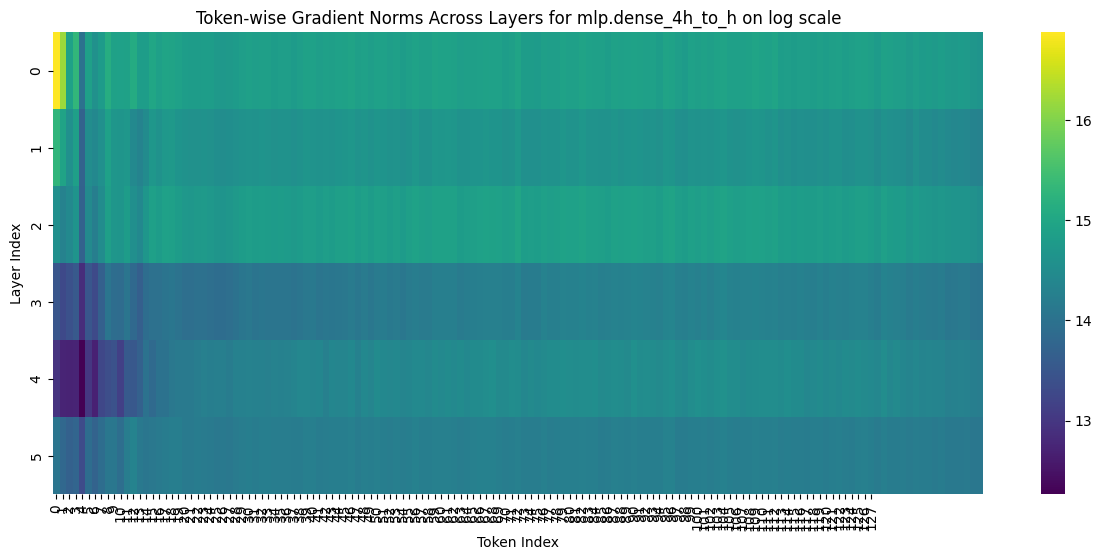

: 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
from tqdm import tqdm
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Load and preprocess data
data = load_dataset("roneneldan/TinyStories")
train_data, val_data = inspect_data(data)

model.train()

# Freeze specific layers
model.gpt_neox.embed_in.requires_grad = False
for layer in model.gpt_neox.layers:
    for param in layer.parameters():
        param.requires_grad = False
    for param in layer.mlp.dense_4h_to_h.parameters():
        param.requires_grad = True
    for param in layer.attention.dense.parameters():
        param.requires_grad = True

# Move model to GPU if available
# device = torch.device("mps" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Prepare for gradient collection
final_data = []
attn_final_data = []
num_samples = 400  # Adjust as needed

# Pre-allocate tensors for gradient storage
layer_count = 6
output_dim = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.shape[0]
attn_all_gradients = torch.zeros((num_samples, 128, layer_count, output_dim))
all_gradients = torch.zeros((num_samples, 128, layer_count, output_dim))

for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    attn_token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=145, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        attn_gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].mlp.dense_4h_to_h  # Access the specific layer/parameter (adapted to Pythia)
            attn_layer = model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
            attn_param_grad = attn_layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token
            attn_gradients.append(attn_param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)
        attn_token_gradients.append(torch.cat(attn_gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)
    attn_token_gradients_tensor = torch.stack(attn_token_gradients)  # Shape: (seq_len, layer_count, output_dim)
    
    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)
    average_attn_gradients_tensor = torch.log(attn_token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)
    attn_final_data.append(average_attn_gradients_tensor)

    if index == 100:
        break
    
# Visualize the results
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.show()
plt.close()

plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(attn_final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for mlp.dense_4h_to_h on log scale')
plt.show()
plt.close()

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



  0%|          | 0/21990 [00:00<?, ?it/s]

torch.Size([1, 128, 50304])


  0%|          | 1/21990 [00:05<35:40:13,  5.84s/it]

torch.Size([1, 128, 50304])


  0%|          | 2/21990 [00:11<34:29:58,  5.65s/it]

torch.Size([1, 128, 50304])


  0%|          | 3/21990 [00:17<34:50:22,  5.70s/it]

torch.Size([1, 128, 50304])


  0%|          | 4/21990 [00:22<34:23:27,  5.63s/it]

torch.Size([1, 128, 50304])


  0%|          | 5/21990 [00:28<34:10:33,  5.60s/it]

torch.Size([1, 128, 50304])


  0%|          | 6/21990 [00:33<33:58:27,  5.56s/it]

torch.Size([1, 128, 50304])


  0%|          | 7/21990 [00:39<33:36:42,  5.50s/it]

torch.Size([1, 128, 50304])


  0%|          | 8/21990 [00:44<33:19:11,  5.46s/it]

torch.Size([1, 128, 50304])


  0%|          | 9/21990 [00:49<33:11:16,  5.44s/it]

torch.Size([1, 128, 50304])


  0%|          | 10/21990 [00:55<32:55:41,  5.39s/it]

torch.Size([1, 128, 50304])


  0%|          | 11/21990 [01:00<32:51:21,  5.38s/it]

torch.Size([1, 128, 50304])


  0%|          | 12/21990 [01:05<32:39:45,  5.35s/it]

torch.Size([1, 128, 50304])


  0%|          | 13/21990 [01:11<32:33:16,  5.33s/it]

torch.Size([1, 128, 50304])


  0%|          | 14/21990 [01:16<32:32:25,  5.33s/it]

torch.Size([1, 128, 50304])


  0%|          | 15/21990 [01:21<32:25:29,  5.31s/it]

torch.Size([1, 128, 50304])


  0%|          | 16/21990 [01:26<32:21:25,  5.30s/it]

torch.Size([1, 128, 50304])


  0%|          | 17/21990 [01:32<32:33:26,  5.33s/it]

torch.Size([1, 128, 50304])


  0%|          | 18/21990 [01:37<32:42:52,  5.36s/it]

torch.Size([1, 128, 50304])


  0%|          | 19/21990 [01:42<32:31:05,  5.33s/it]

torch.Size([1, 128, 50304])


  0%|          | 20/21990 [01:48<32:29:00,  5.32s/it]

torch.Size([1, 128, 50304])


  0%|          | 21/21990 [01:53<32:27:50,  5.32s/it]

torch.Size([1, 128, 50304])


  0%|          | 22/21990 [01:58<32:26:43,  5.32s/it]

torch.Size([1, 128, 50304])


  0%|          | 23/21990 [02:04<33:02:11,  5.41s/it]

torch.Size([1, 128, 50304])


  0%|          | 24/21990 [02:09<33:02:03,  5.41s/it]

torch.Size([1, 128, 50304])


  0%|          | 25/21990 [02:15<32:49:46,  5.38s/it]

torch.Size([1, 128, 50304])


  0%|          | 26/21990 [02:20<32:45:24,  5.37s/it]

torch.Size([1, 128, 50304])


  0%|          | 27/21990 [02:26<32:50:21,  5.38s/it]

torch.Size([1, 128, 50304])


  0%|          | 28/21990 [02:31<32:41:33,  5.36s/it]

torch.Size([1, 128, 50304])


  0%|          | 29/21990 [02:36<32:37:06,  5.35s/it]

torch.Size([1, 128, 50304])


  0%|          | 30/21990 [02:42<32:41:54,  5.36s/it]

torch.Size([1, 128, 50304])


  0%|          | 31/21990 [02:47<33:15:29,  5.45s/it]

torch.Size([1, 128, 50304])


  0%|          | 32/21990 [02:53<34:43:07,  5.69s/it]

torch.Size([1, 128, 50304])


  0%|          | 33/21990 [02:59<34:34:36,  5.67s/it]

torch.Size([1, 128, 50304])


  0%|          | 34/21990 [03:05<34:11:03,  5.61s/it]

torch.Size([1, 128, 50304])


  0%|          | 35/21990 [03:10<33:45:34,  5.54s/it]

torch.Size([1, 128, 50304])


  0%|          | 36/21990 [03:15<33:26:17,  5.48s/it]

torch.Size([1, 128, 50304])


  0%|          | 37/21990 [03:21<33:08:08,  5.43s/it]

torch.Size([1, 128, 50304])


  0%|          | 38/21990 [03:26<32:46:19,  5.37s/it]

torch.Size([1, 128, 50304])


  0%|          | 39/21990 [03:31<32:29:51,  5.33s/it]

torch.Size([1, 128, 50304])


  0%|          | 40/21990 [03:36<32:22:37,  5.31s/it]

torch.Size([1, 128, 50304])


  0%|          | 41/21990 [03:42<32:10:14,  5.28s/it]

torch.Size([1, 128, 50304])


  0%|          | 42/21990 [03:47<32:04:03,  5.26s/it]

torch.Size([1, 128, 50304])


  0%|          | 43/21990 [03:52<32:13:15,  5.29s/it]

torch.Size([1, 128, 50304])


  0%|          | 44/21990 [03:57<32:08:08,  5.27s/it]

torch.Size([1, 128, 50304])


  0%|          | 45/21990 [04:03<32:13:34,  5.29s/it]

torch.Size([1, 128, 50304])


  0%|          | 46/21990 [04:08<32:32:27,  5.34s/it]

torch.Size([1, 128, 50304])


  0%|          | 47/21990 [04:14<33:26:47,  5.49s/it]

torch.Size([1, 128, 50304])


  0%|          | 48/21990 [04:19<33:10:56,  5.44s/it]

torch.Size([1, 128, 50304])


  0%|          | 49/21990 [04:25<32:48:51,  5.38s/it]

torch.Size([1, 128, 50304])


  0%|          | 50/21990 [04:30<32:32:33,  5.34s/it]

torch.Size([1, 128, 50304])


  0%|          | 50/21990 [04:35<33:34:41,  5.51s/it]


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

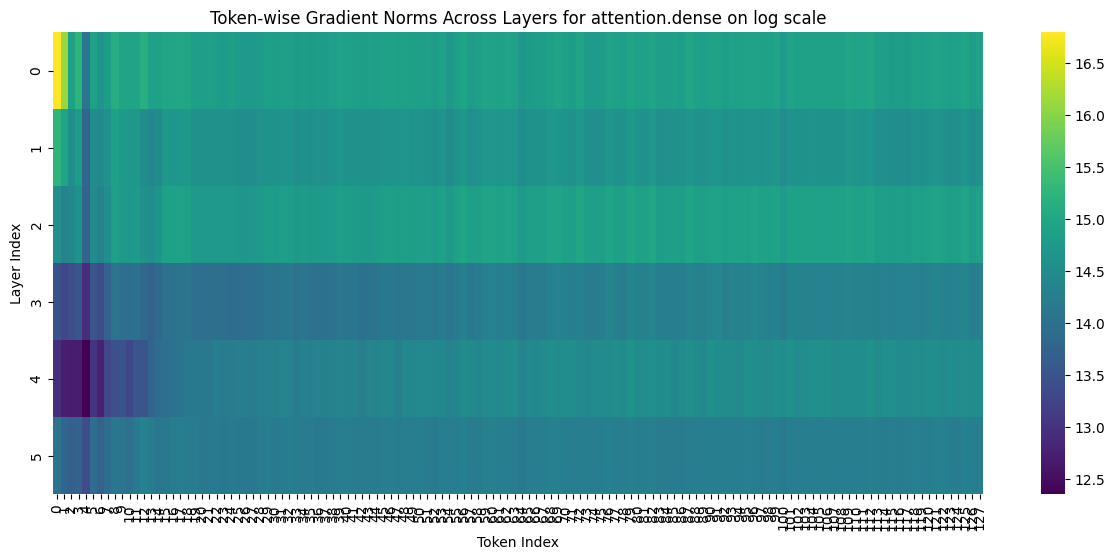

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'
# inputs = tokenizer(input_text, return_tensors="pt")


# Define a list to store gradients per token


# Ensure the model is in evaluation mode
# model.eval()

final_data = []


for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    print(logits.shape)

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        # gradient = torch.ones_like(logits)
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)


    if index == 50:
        break


# Visualize the gradients using a heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
plt.xlabel('Token Index')
plt.ylabel('Layer Index')
plt.title('Token-wise Gradient Norms Across Layers for attention.dense on log scale')
plt.savefig("Pythia_Attention_Grad_50_samples.png")
plt.close

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoModelForCausalLM, AutoTokenizer
from imports import *
from dataset import *

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

train_data, val_data = inspect_data(data)

# Sample input
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'


inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)
outputs = model(**inputs)
logits = outputs.logits
all_token_loss = []

loss_fn = torch.nn.CrossEntropyLoss()

# Compute token-wise losses
for token_idx in range(inputs["input_ids"].shape[1]):
    logit_token = logits[0, token_idx, :].contiguous()  # Logits for the current token
    label_token = inputs["input_ids"][0, token_idx].contiguous()  # Ground truth token (integer)
    
    # Compute token loss
    token_loss = loss_fn(logit_token.unsqueeze(0), label_token.unsqueeze(0))
    all_token_loss.append(token_loss)

# Stack all token losses into a tensor
all_token_loss_tensor = torch.stack(all_token_loss)

# Create the custom gradient for backward
# In this case, let's assume you want a gradient of 1 for each token loss
gradient = torch.ones_like(all_token_loss_tensor)

# Compute gradients with respect to the model parameters
all_token_loss_tensor.backward(gradient=gradient, retain_graph=True)

        
'''
for index, data in enumerate(tqdm(val_data["text"])):
    
    token_gradients = []
    
    inputs = tokenizer(data, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

    # Get the outputs and compute loss
    outputs = model(**inputs)
    logits = outputs.logits
    loss = logits.sum()  # Example loss

    print(logits.shape)

    # Iterate over each token
    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)
        model.zero_grad()  # Clear any previous gradients
        
        # Compute loss only for this specific token's contribution
        # Modify this if needed to focus on the exact component of the loss related to the token
        token_loss = logits[0, token_idx, :].sum()
        # gradient = torch.ones_like(logits)
        # Perform backward pass
        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes
        
        # Collect the gradient of the specific parameter for this token
        gradients = []
        for i in range(6):
            layer = model.gpt_neox.layers[i].attention.dense  # Access the specific layer/parameter (adapted to Pythia)
            param_grad = layer.weight.grad.clone().view(-1)  # Clone and reshape the gradient
            gradients.append(param_grad.unsqueeze(0))  # Append the gradient for this token

        # Convert gradients to a tensor and add to the list
        token_gradients.append(torch.cat(gradients, dim=0))  # Shape: (layer_count, output_dim)

    # Convert token gradients to a tensor for visualization
    token_gradients_tensor = torch.stack(token_gradients)  # Shape: (seq_len, layer_count, output_dim)

    # Compute the average gradient norm across layers for visualization
    average_gradients_tensor = torch.log(token_gradients_tensor.norm(dim=2))  # Shape: (seq_len, layer_count)

    final_data.append(average_gradients_tensor)


    if index == 50:
        break
'''

# Visualize the gradients using a heatmap
# plt.figure(figsize=(15, 6))
# sns.heatmap(np.mean(np.array(final_data), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(average_gradients_tensor.size(0)))
# plt.xlabel('Token Index')
# plt.ylabel('Layer Index')
# plt.title('Token-wise Gradient Norms Across Layers for attention.dense on log scale')
# plt.savefig("Pythia_Attention_Grad_50_samples.png")
# plt.close

'Training set size: 2119719'
'Validation set size: 21990'
['text']
{'text': Value(dtype='string', id=None)}

'---------------------------------'



'\nfor index, data in enumerate(tqdm(val_data["text"])):\n    \n    token_gradients = []\n    \n    inputs = tokenizer(data, return_tensors="pt", padding=\'max_length\', max_length=128, truncation=True)\n\n    # Get the outputs and compute loss\n    outputs = model(**inputs)\n    logits = outputs.logits\n    loss = logits.sum()  # Example loss\n\n    print(logits.shape)\n\n    # Iterate over each token\n    for token_idx in range(inputs["input_ids"].shape[1]):  # Loop over the sequence length (tokens)\n        model.zero_grad()  # Clear any previous gradients\n        \n        # Compute loss only for this specific token\'s contribution\n        # Modify this if needed to focus on the exact component of the loss related to the token\n        token_loss = logits[0, token_idx, :].sum()\n        # gradient = torch.ones_like(logits)\n        # Perform backward pass\n        token_loss.backward(retain_graph=True)  # retain_graph=True allows subsequent backward passes\n        \n        # Co

In [9]:
model

GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 512)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-5): 6 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXSdpaAttention(
          (rotary_emb): GPTNeoXRotaryEmbedding()
          (query_key_value): Linear(in_features=512, out_features=1536, bias=True)
          (dense): Linear(in_features=512, out_features=512, bias=True)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=512, out_features=2048, bias=True)
          (dense_4h_to_h): Linear(in_features=2048, out_features=512, bias=True)
        

In [12]:
import torch
import torch as t
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Ensure the model is in training mode
model.train()

# Sample input texts for batch processing
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lilys shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'


# Tokenize the batch of input texts
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

# Forward pass
outputs = model(**inputs)
logits = outputs.logits

loss_fn = torch.nn.CrossEntropyLoss()

# Initialize a tensor to hold all token losses
batch_size, seq_length, _ = logits.size()
all_token_losses = []

# Calculate token losses
for token_idx in range(seq_length):
    logit_tokens = logits[:, token_idx, :]  
    label_tokens = inputs["input_ids"][:, token_idx]  
    
    token_loss = loss_fn(logit_tokens, label_tokens)  
    all_token_losses.append(token_loss)

# Stack token losses into a tensor
all_token_losses_tensor = torch.stack(all_token_losses)

# Define a function to compute the total loss for a given set of model parameters
def compute_loss(*model_params):
    # Assign the model parameters
    with torch.no_grad():
        for layer_idx, layer in enumerate(model.gpt_neox.layers):
            # Update the MLP weights for each layer
            layer.mlp.dense_4h_to_h.weight.copy_(model_params[layer_idx].clone())
    
    # Compute the forward pass
    outputs = model(**inputs)
    logits = outputs.logits
    
    # Calculate the losses again
    token_losses = []
    for token_idx in range(seq_length):
        logit_tokens = logits[:, token_idx, :]  
        label_tokens = inputs["input_ids"][:, token_idx]  
        token_loss = loss_fn(logit_tokens, label_tokens)
        token_losses.append(token_loss)
    
    return torch.stack(token_losses)

# Ensure gradients are zero before backpropagation
model.zero_grad()  

# Compute the gradients with respect to all_token_losses_tensor
all_token_losses_tensor.sum().backward(retain_graph=True)

# Gather model parameters for all MLP layers
model_params = tuple(layer.mlp.dense_4h_to_h.weight.clone().detach().requires_grad_(True) for layer in model.gpt_neox.layers)


# Compute the Jacobian for all MLP layers
# Note that model_params is now a tuple
jacobian = torch.autograd.functional.jacobian(compute_loss, model_params)
# mod_jacobian = [t.norm(j.view(j.size(0), -1), dim = -1, keepdim=True) for j in jacobian]

# # Print the shape of the Jacobian for each layer
for i, j in enumerate(jacobian):
    print(f"Jacobian shape for layer {i}: {j}")  # Display the shape of the Jacobian for each layer


# plt.figure(figsize=(15, 6))
# sns.heatmap(np.mean(np.array(mod_jacobian), axis = 0).T, cmap='viridis', cbar=True, yticklabels=range(6), xticklabels=range(128))
# plt.xlabel('Token Index')
# plt.ylabel('Layer Index')
# plt.title('Token-wise Gradient Norms Across Layers for attention.dense on log scale')
# plt.show()
# plt.close

Jacobian shape for layer 0: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0.,

In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Ensure the model is in training mode
model.train()

# Sample input texts for batch processing
input_text = 'One day, a little girl named Lily found a needle in her room...'

# Tokenize the batch of input texts
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

# Forward pass
loss_fn = torch.nn.CrossEntropyLoss()

# Define a function to compute the total loss
def compute_loss(model_params):
    # Update the model's weight with the new parameters
    model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data.copy_(model_params)

    # Compute the forward pass
    outputs = model(**inputs)
    logits = outputs.logits
    
    print("Logits:", logits)

    # Calculate the token-wise losses
    token_losses = []
    for token_idx in range(128):
        logit_tokens = logits[:, token_idx, :]
        label_tokens = inputs["input_ids"][:, token_idx]
        token_loss = loss_fn(logit_tokens, label_tokens)
        token_losses.append(token_loss)
    
    # Debugging: Check token losses
    print("Token losses:", token_losses)
    
    return torch.stack(token_losses)  # Return the total loss

# Zero the gradients
model.zero_grad()

# Get the model parameter for differentiation
model_params = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight  # Use the original parameter directly

# Ensure the parameter requires gradient
model_params.requires_grad_(True)

# Compute the Jacobian (with respect to model parameters)
jacobian = torch.autograd.functional.jacobian(compute_loss, model_params)

# Print the shape of the Jacobian and check the values
print("Jacobian shape:", jacobian.shape)
print("Jacobian values:", jacobian)


Logits: tensor([[[1068.2761,  231.8028, 1069.5304,  ...,  231.8100,  231.8071,
           231.8078],
         [1071.3625,  227.1288, 1075.1350,  ...,  227.1369,  227.1331,
           227.1340],
         [1073.1744,  227.7072, 1072.4758,  ...,  227.7141,  227.7109,
           227.7118],
         ...,
         [1069.5854,  229.5350, 1068.7228,  ...,  229.5416,  229.5369,
           229.5397],
         [1069.5316,  229.4304, 1068.6277,  ...,  229.4369,  229.4322,
           229.4350],
         [1069.2749,  229.3979, 1068.4136,  ...,  229.4046,  229.3999,
           229.4028]]], grad_fn=<UnsafeViewBackward0>)
Token losses: [tensor(8.3825, grad_fn=<NllLossBackward0>), tensor(8.7033, grad_fn=<NllLossBackward0>), tensor(8.3041, grad_fn=<NllLossBackward0>), tensor(8.7565, grad_fn=<NllLossBackward0>), tensor(6.1559, grad_fn=<NllLossBackward0>), tensor(7.2713, grad_fn=<NllLossBackward0>), tensor(9.4540, grad_fn=<NllLossBackward0>), tensor(9.1558, grad_fn=<NllLossBackward0>), tensor(10.5378, grad

In [6]:
from transformers import AutoModelForCausalLM

import torch.nn as nn

class Pythia70MModel(nn.Module):
    def __init__(self, model, model_params, model_name='EleutherAI/pythia-70m'):
        super(Pythia70MModel, self).__init__()
        self.model = model
        self.model_params = model_params
        self.tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
        self.tokenizer.pad_token = tokenizer.eos_token
        input_text = 'One day, a little girl named Lily found a needle in her room...'
        self.inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)
        self.loss_fn = torch.nn.CrossEntropyLoss()

    def forward(self, attention_mask=None):
        self.model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight.data.copy_(model_params)

        # Compute the forward pass
        outputs = self.model(**inputs)
        logits = outputs.logits
        
        # print("Logits:", logits)

        # Calculate the token-wise losses
        token_losses = []
        for token_idx in range(128):
            logit_tokens = logits[:, token_idx, :]
            label_tokens = self.inputs["input_ids"][:, token_idx]
            token_loss = self.loss_fn(logit_tokens, label_tokens)
            token_losses.append(token_loss)
        
        # Debugging: Check token losses
        # print("Token losses:", token_losses)
        
        return torch.stack(token_losses)

model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
model_params = model.gpt_neox.layers[0].mlp.dense_4h_to_h.weight
# Instantiate the model
pythia_model = Pythia70MModel(model=model, model_params=model_params)
jacobian = torch.autograd.functional.jacobian(pythia_model.forward(), model_params)

# Example usage
# outputs = pythia_model(inputs['input_ids'])
# print(outputs)
print(jacobian)

/Users/maheepchaudhary/miniforge3/envs/transit/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


TypeError: Pythia70MModel.forward() missing 1 required positional argument: 'input_ids'

In [18]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the Pythia model and tokenizer
model = AutoModelForCausalLM.from_pretrained('EleutherAI/pythia-70m')
tokenizer = AutoTokenizer.from_pretrained('EleutherAI/pythia-70m')
tokenizer.pad_token = tokenizer.eos_token

# Ensure the model is in training mode
model.train()

# Make sure gradients are enabled for all model parameters
for param in model.parameters():
    param.requires_grad = True

# Sample input text
input_text = 'One day, a little girl named Lily found a needle in her room. She knew it was difficult to play with it because it was sharp. Lily wanted to share the needle with her mom, so she could sew a button on her shirt. Lily went to her mom and said, "Mom, I found this needle. Can you share it with me and sew my shirt?" Her mom smiled and said, "Yes, Lily, we can share the needle and fix your shirt." Together, they shared the needle and sewed the button on Lily\'s shirt. It was not difficult for them because they were sharing and helping each other. After they finished, Lily thanked her mom for sharing the needle and fixing her shirt. They both felt happy because they had shared and worked together.'

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt", padding='max_length', max_length=128, truncation=True)

# Define the loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define a function to compute the loss
def compute_loss(*params):
    # Update model parameters (you can omit this part if you're not modifying them externally)
    for param, new_param in zip(model.parameters(), params):
        param.data.copy_(new_param)
    
    # Forward pass through the model
    outputs = model(**inputs)
    logits = outputs.logits
    
    # Shift the logits and labels for causal language modeling
    shift_logits = logits[..., :-1, :].contiguous()
    shift_labels = inputs["input_ids"][..., 1:].contiguous()
    
    # Compute the loss
    loss = loss_fn(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
    
    return loss

# Compute the loss
loss = compute_loss(*model.parameters())

# Backpropagation
model.zero_grad()
loss.backward()

# Check gradients
# for name, param in model.named_parameters():
#     if param.grad is not None:
#         print(f"{name} grad: {param.grad}")

# Get all model parameters
params = tuple(model.parameters())

# Compute the Jacobian (be cautious, this can be very expensive for large models)
jacobian = torch.autograd.functional.jacobian(compute_loss, params)

# Print Jacobian information
for i, j in enumerate(jacobian):
    print(f"Parameter {i} Jacobian shape: {j.shape}")
    print(f"Parameter {i} Jacobian sum: {j.sum()}")
    print(f"Parameter {i} Jacobian mean: {j.mean()}")
    print(f"Parameter {i} Jacobian std: {j.std()}")
    print("---")


Parameter 0 Jacobian shape: torch.Size([50304, 512])
Parameter 0 Jacobian sum: 0.0
Parameter 0 Jacobian mean: 0.0
Parameter 0 Jacobian std: 0.0
---
Parameter 1 Jacobian shape: torch.Size([512])
Parameter 1 Jacobian sum: 0.0
Parameter 1 Jacobian mean: 0.0
Parameter 1 Jacobian std: 0.0
---
Parameter 2 Jacobian shape: torch.Size([512])
Parameter 2 Jacobian sum: 0.0
Parameter 2 Jacobian mean: 0.0
Parameter 2 Jacobian std: 0.0
---
Parameter 3 Jacobian shape: torch.Size([512])
Parameter 3 Jacobian sum: 0.0
Parameter 3 Jacobian mean: 0.0
Parameter 3 Jacobian std: 0.0
---
Parameter 4 Jacobian shape: torch.Size([512])
Parameter 4 Jacobian sum: 0.0
Parameter 4 Jacobian mean: 0.0
Parameter 4 Jacobian std: 0.0
---
Parameter 5 Jacobian shape: torch.Size([1536, 512])
Parameter 5 Jacobian sum: 0.0
Parameter 5 Jacobian mean: 0.0
Parameter 5 Jacobian std: 0.0
---
Parameter 6 Jacobian shape: torch.Size([1536])
Parameter 6 Jacobian sum: 0.0
Parameter 6 Jacobian mean: 0.0
Parameter 6 Jacobian std: 0.0
---

In [35]:
def matmul_func(a, b):
    return a @ b

# Initialize tensors
a = t.randn((2, 3), requires_grad=True)
b = t.randn((3, 2), requires_grad=True)

# Compute the Jacobian
jacobian = t.autograd.functional.jacobian(matmul_func, (a, b))

jacobian[1].size()

torch.Size([2, 2, 3, 2])

In [23]:
import torch as t

a = t.randn((2, 3), requires_grad=True)
b = t.randn((3, 2), requires_grad=True)

c = a @ b

# Create a zero tensor to accumulate the gradients
gradients = t.zeros_like(a)

# Iterate over all elements of c
for i in range(c.size(0)):  # Loop over rows
    for j in range(c.size(1)):  # Loop over columns
        # Compute gradient of c[i][j] w.r.t. a
        grad = t.autograd.grad(c[i, j], a, retain_graph=True)[0]
        gradients += grad  # Accumulate the gradients

print(gradients)


tensor([[ 1.8166,  1.6457, -2.9908],
        [ 1.8166,  1.6457, -2.9908]])


In [6]:
import torch as t
import multiprocessing

def compute_gradient(index, a, c):
    # Compute gradient of c[index] w.r.t. a
    return t.autograd.grad(c[index], a, retain_graph=True)[0]

if __name__ == '__main__':
    # Initialize tensors
    a = t.randn((2, 3), requires_grad=True)
    b = t.randn((3, 2), requires_grad=True)

    # Matrix multiplication
    c = a @ b  # Shape will be (2, 2)

    # Create a pool of workers
    with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
        # Prepare indices for each element in c
        indices = list(range(c.numel()))
        # Use map to compute gradients in parallel
        gradients = pool.starmap(compute_gradient, [(i, a, c.view(-1)) for i in indices])
    
    # Convert the list of tensors to a single tensor
    gradients_tensor = t.stack(gradients)

    # Reshape the gradients tensor to (4, 3)
    gradients_tensor = gradients_tensor.view(-1, a.size(1))  # Reshape to (4, 3)

    print(gradients_tensor.shape)  # Should output: torch.Size([4, 3])
    print(gradients_tensor)  # Display the gradients


RuntimeError: Cowardly refusing to serialize non-leaf tensor which requires_grad, since autograd does not support crossing process boundaries.  If you just want to transfer the data, call detach() on the tensor before serializing (e.g., putting it on the queue).

In [8]:
multiprocessing.cpu_count()

AttributeError: module 'multiprocessing' has no attribute 'mps_count'

In [21]:
import torch as t
import time as tm

def func1(a,b):
    tm.sleep(10)
    return a@b

def func2(a,b):
    tm.sleep(10)
    return t.add(a,b)

a = t.randn((2,3), requires_grad=True)
c = t.randn((2,3), requires_grad=True)
b = t.randn((3,2), requires_grad=True)

d = func1(a,b)
e = func2(a,c)


In [22]:
import torch as t
import time as tm
import threading

def func1(a, b, result):
    tm.sleep(10)  # Simulating a long computation
    result.append(a @ b)  # Store the result in a shared list

def func2(a, c, result):
    tm.sleep(10)  # Simulating a long computation
    result.append(t.add(a, c))  # Store the result in a shared list

if __name__ == "__main__":
    a = t.randn((2, 3), requires_grad=True, device='mps')  # Ensure data is on MPS
    c = t.randn((2, 3), requires_grad=True, device='mps')
    b = t.randn((3, 2), requires_grad=True, device='mps')

    results = []  # List to hold results

    # Create threads for func1 and func2
    thread1 = threading.Thread(target=func1, args=(a, b, results))
    thread2 = threading.Thread(target=func2, args=(a, c, results))
    
    thread1.start()
    thread2.start()

    # Wait for both threads to complete
    thread1.join()
    thread2.join()

    # Retrieve results
    result1 = results[0]
    result2 = results[1]

    print("Result of func1 (a @ b):", result1)
    print("Result of func2 (a + c):", result2)


Result of func1 (a @ b): tensor([[ 1.5635,  1.3328, -0.5545],
        [-0.1930,  1.4848,  1.5507]], device='mps:0', grad_fn=<AddBackward0>)
Result of func2 (a + c): tensor([[-0.3259, -0.1131],
        [-0.9223, -0.0867]], device='mps:0', grad_fn=<MmBackward0>)
